In [ ]:
!pip install PyQt5
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 5.0 MB/s 
     |████████████████████████████████| 59.9 MB 77.1 MB/s 
     |████████████████████████████████| 361 kB 68.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/HW2_5data/training_dataset > /dev/null
!unzip /content/gdrive/MyDrive/HW2_5data/inference_dataset > /dev/null
!unzip /content/gdrive/MyDrive/HW2_5data/validation_dataset > /dev/null

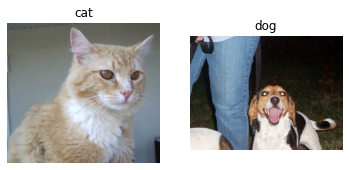

In [ ]:
#5.1
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
#貓
plt.subplot(1,2,1)
plt.title("cat")
os.chdir('/content/inference_dataset/Cat')
img_cat=img.imread('8043.jpg')
plt.imshow(img_cat)
plt.axis('off')
#狗
plt.subplot(1,2,2)
plt.title("dog")
os.chdir('/content/inference_dataset/Dog')
img_dog=img.imread('12051.jpg')
plt.imshow(img_dog)
plt.axis('off')
plt.show()

In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline 

TEST_SIZE = 0.5
RANDOM_STATE = 2018
BATCH_SIZE = 64
NO_EPOCHS = 20
NUM_CLASSES = 2
SAMPLE_SIZE = 20000
PATH = '/content/gdrive/MyDrive/HW2_5data'
TRAIN_FOLDER = './train/'
TEST_FOLDER =  './test/'
IMG_SIZE = 224
RESNET_WEIGHTS_PATH = '/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'



In [ ]:
train_image_path = os.path.join(PATH, "training_dataset.zip")
test_image_path = os.path.join(PATH, "inference_dataset.zip")
import zipfile
with zipfile.ZipFile(train_image_path,"r") as z:
    z.extractall(".")
with zipfile.ZipFile(test_image_path,"r") as z:
    z.extractall(".")
train_image_list = os.listdir("./training_dataset/")[0:SAMPLE_SIZE]
test_image_list = os.listdir("./inference_dataset/")

def label_pet_image_one_hot_encoder(img):
    pet = img.split('.')[-3]
    if pet == 'cat': return [1,0]
    elif pet == 'dog': return [0,1]
def process_data(data_image_list, DATA_FOLDER, isTrain=True):
    data_df = []
    for img in tqdm(data_image_list):
        path = os.path.join(DATA_FOLDER,img)
        if(isTrain):
            label = label_pet_image_one_hot_encoder(img)
        else:
            label = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        data_df.append([np.array(img),np.array(label)])
    shuffle(data_df)
    return data_df
def plot_image_list_count(data_image_list):
    labels = []
    for img in data_image_list:
        labels.append(img.split('.')[-3])
    sns.countplot(labels)
    plt.title('Cats and Dogs')
    
plot_image_list_count(train_image_list)
plot_image_list_count(os.listdir(TRAIN_FOLDER))



IndexError: ignored

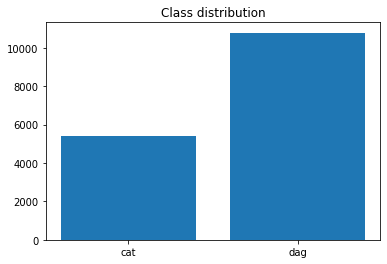

<Figure size 432x288 with 0 Axes>

In [ ]:
#5.2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model,load_model,save_model
from keras.layers import Input, Dense, ReLU, Add, Flatten, AveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Softmax
from keras.optimizers import SGD, Adam
from keras.callbacks import Callback, TensorBoard
from PIL import Image
import time, os, random, cv2

os.chdir('/content/training_dataset')
cat_file_name = os.listdir('/content/training_dataset/Cat')
os.chdir('/content/training_dataset')
dog_file_name = os.listdir('/content/training_dataset/Dog')
plt.title("Class distribution")
x = ["cat","dag"]        # 水平資料點
h = [len(cat_file_name),len(dog_file_name)]   # 高度
plt.bar(x,h)
plt.show()
os.chdir('/content/HW2output')
plt.savefig("class distribution.jpg")

In [ ]:
#5.3
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(classes=10,include_top=True,weights=None, input_shape=(224,224,3))


In [ ]:
model.summary()
model.save('ResNet50_ori.h5',model)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow.keras.layers
import keras.models
from keras.models import Sequential
RESNET_WEIGHTS_PATH = '/content/HW2output/ResNet50_ori.h5'
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights=RESNET_WEIGHTS_PATH))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True
model.compile()

ValueError: ignored